## Fluctuations on a path

In [1]:
import numpy as np
from matplotlib import pyplot as plt

##### Input parameters

In [7]:
sigmas = [0.1, 0.5, 1, 1.5, 2]#standard deviations to be tested
no_of_runs_per_sigma = 5
no_of_fluctuations = 10
target_value = 3
behind_the_target_value = 3.5
path_length = 10

##### auxiliary

In [3]:
no_of_x_points = 100*no_of_fluctuations
x=np.linspace(0, path_length, no_of_x_points)
y = behind_the_target_value/path_length*x
target = np.array([target_value]*len(x))

In [4]:
def repeated_entries(v, n):
    #repeats every v entry n times
    def my_concat(a,b):#wrapper around np.concatenate that is usable by reduce
        return np.concatenate((a,b))
    from functools import reduce
    return reduce(my_concat, [np.full((1,int(n)), v_entry)[0] for v_entry in v])#np.full may be used but it

def spreaded_array(v, target_length):
    #repeats entries of v so that it has target length
    #target_length must be multiplicity of length of v
    return repeated_entries(v, target_length/len(v))

In [5]:
fluct_pre_steps = np.cumsum(np.random.normal(0, 1, 9))#fluctuation steps
fluct_steps = np.concatenate((np.array([0]), fluct_pre_steps))

##### draw plots

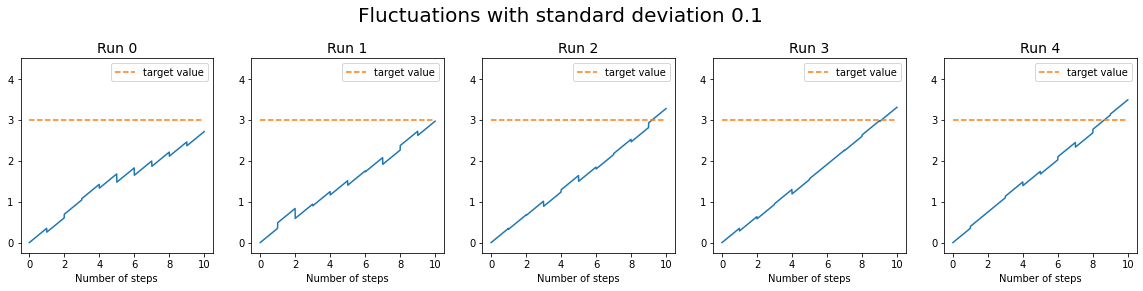

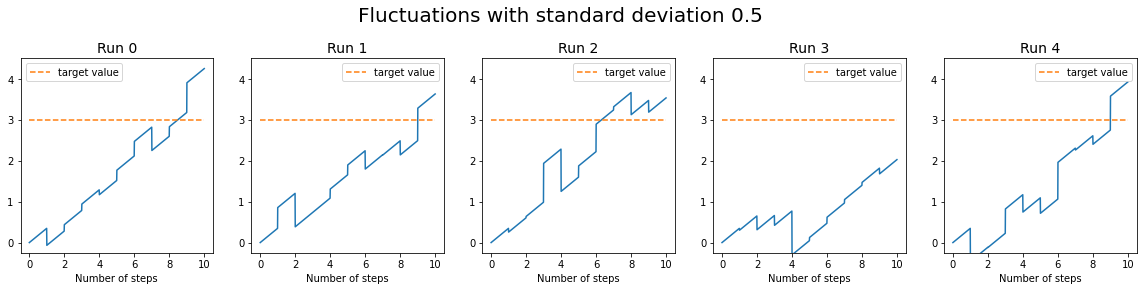

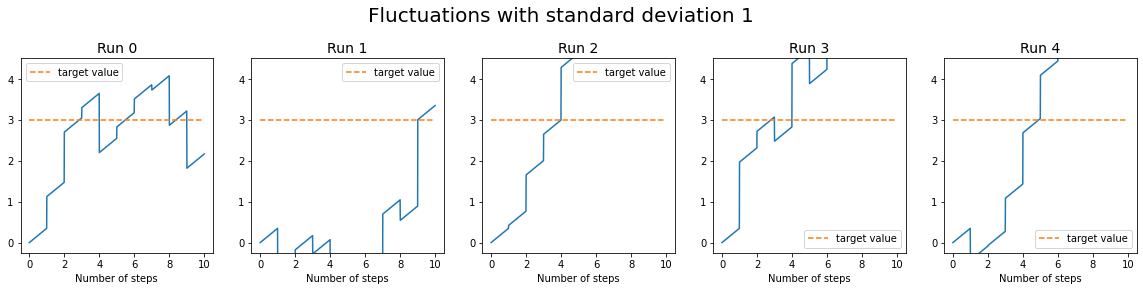

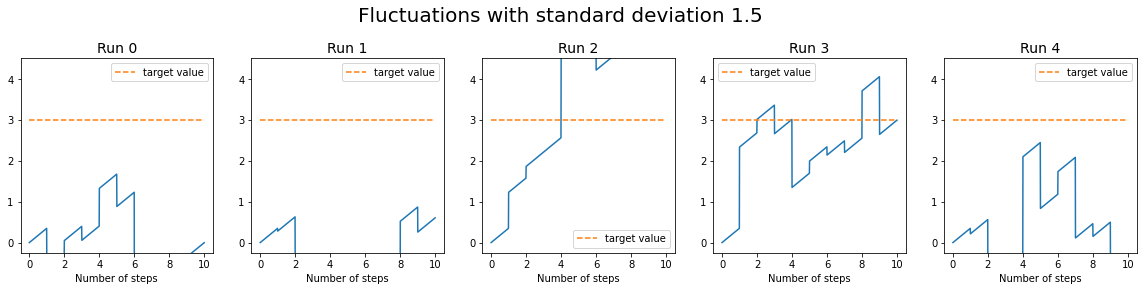

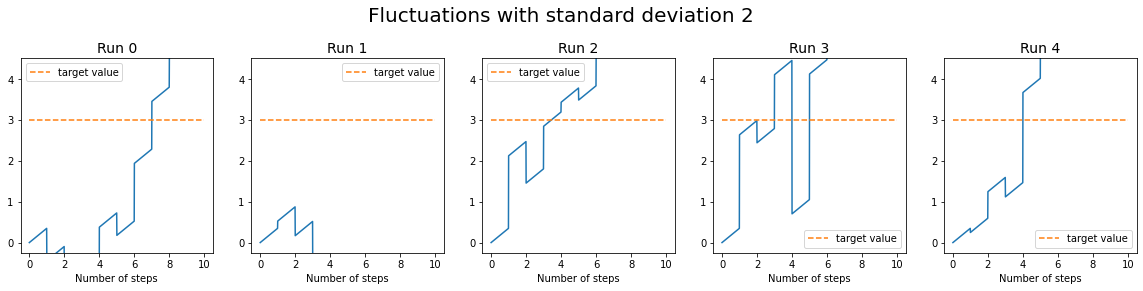

In [16]:
for sigma in sigmas:
    fig, ax = plt.subplots(1, no_of_runs_per_sigma, figsize=(20,4))
    for i in range(no_of_runs_per_sigma):#plot fluctuated y
        #create fluctuated y
        fluct_pre_steps = np.cumsum(np.random.normal(0, sigma, no_of_fluctuations-1))#fluctuation steps
        fluct_steps = np.concatenate((np.array([0]), fluct_pre_steps))
        fluct = spreaded_array(fluct_steps, no_of_x_points)#actual fluctuation vector
        y_fluctuated = y + fluct
        #plot fluctuated y
        ax[i].plot(x, y_fluctuated)
        #plot target value
        ax[i].plot(x, np.full((1,len(x)), target_value)[0], '--', label='target value')
        #label plot (and set delimiters)
        fig.suptitle('Fluctuations with standard deviation' + ' ' + str(sigma), fontsize=20)
        ax[i].set_title('Run' + ' ' + str(i), fontsize=14)
        ax[i].set_xlabel('Number of steps')
        ax[i].set_ylim(0 + (-0.25), 4.5)
        ax[i].legend()
        plt.subplots_adjust(top=0.8)